In [1]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
#movie = '130721_CCA60_RAW'
#movie ='280523 AM100 568'
movie = 'control_1_050721'

MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from objects import movie_structure
from objects.movie_structure import gaussian_curvature, mean_curvature

import importlib
import seaborn as sns
#import scalar_mappable
from matplotlib.cm import ScalarMappable
#import gaussian_filter
from scipy.ndimage import gaussian_filter

In [10]:
surface = np.load(MOVIE_PATH + 'np/height.npy')
membrane = np.load(MOVIE_PATH + 'np/membrane.npy')
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [4]:
del gel


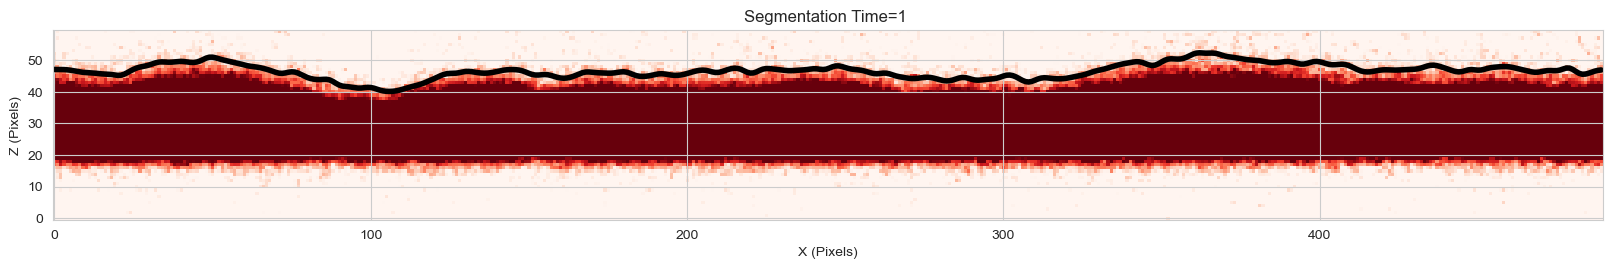

In [98]:
t = 1
y = 350
x1 = 10
x2 = 500
z1 = 0
z2 = 60
plot_sigma = 2
fig,ax1 = plt.subplots(1,1,figsize=(20,20))
h = surface[t]
m = membrane[t]+3
#sm = ScalarMappable(cmap='coolwarm')
#sm.set_array(h)
#cbar = plt.colorbar(sm)
img = gel[t,z1:z2,y,x1:x2].copy()
pixel_size_x = 0.168
pixel_size_y = 0.270

'''up = gaussian_filter(h[y,x1:x2 ],sigma = plot_sigma ).astype(int)
down =gaussian_filter(m[y,x1:x2 ],sigma = plot_sigma ).astype(int)
background_mask = np.zeros((z2-z1,x2-x1), dtype=bool)

for i in range(len(up)):
    background_mask[up[i]:,i] = True
    background_mask[:down[i],i] = True
img[background_mask] = np.nan'''
#img[~background_mask] = 1
# Define extent: left, right, bottom, top
#extent = [0, img.shape[1] * pixel_size_x, 0, img.shape[0] * pixel_size_y]

ax1.imshow(img,origin='lower', cmap='Reds', vmin= 1.04, vmax =1.2)#,extent=extent)
ax1.set_xlabel('X (Pixels)')
ax1.set_ylabel('Z (Pixels)')
ax1.plot(gaussian_filter(h[y,x1:x2 ],sigma = plot_sigma ), 'black', lw= 4 ,linestyle='-')
#ax1.plot(gaussian_filter(m[y,x1:x2 ],sigma = plot_sigma ), 'w', linestyle='-')

#im= ax2.imshow(h, origin='lower', cmap='coolwarm')

#ax2.set_xlabel('X (Pixels)')
#ax2.set_ylabel('Y (Pixels)')
#ax2.set_title('Surface computed \n y=%d'%y)
plt.title('Segmentation Time=%d ' % t)
# Connect the key press event to the on_key function
#plt.axis('off')
#plt.title("")
#extent = ax1.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())
plt.savefig(r'\\132.72.218.248\Yuval_and_Shachar\evolution paper\\' + '%s_sideview_t%dy%d+membrane.png'%(movie,t,y))#, bbox_inches=extent)
plt.show()


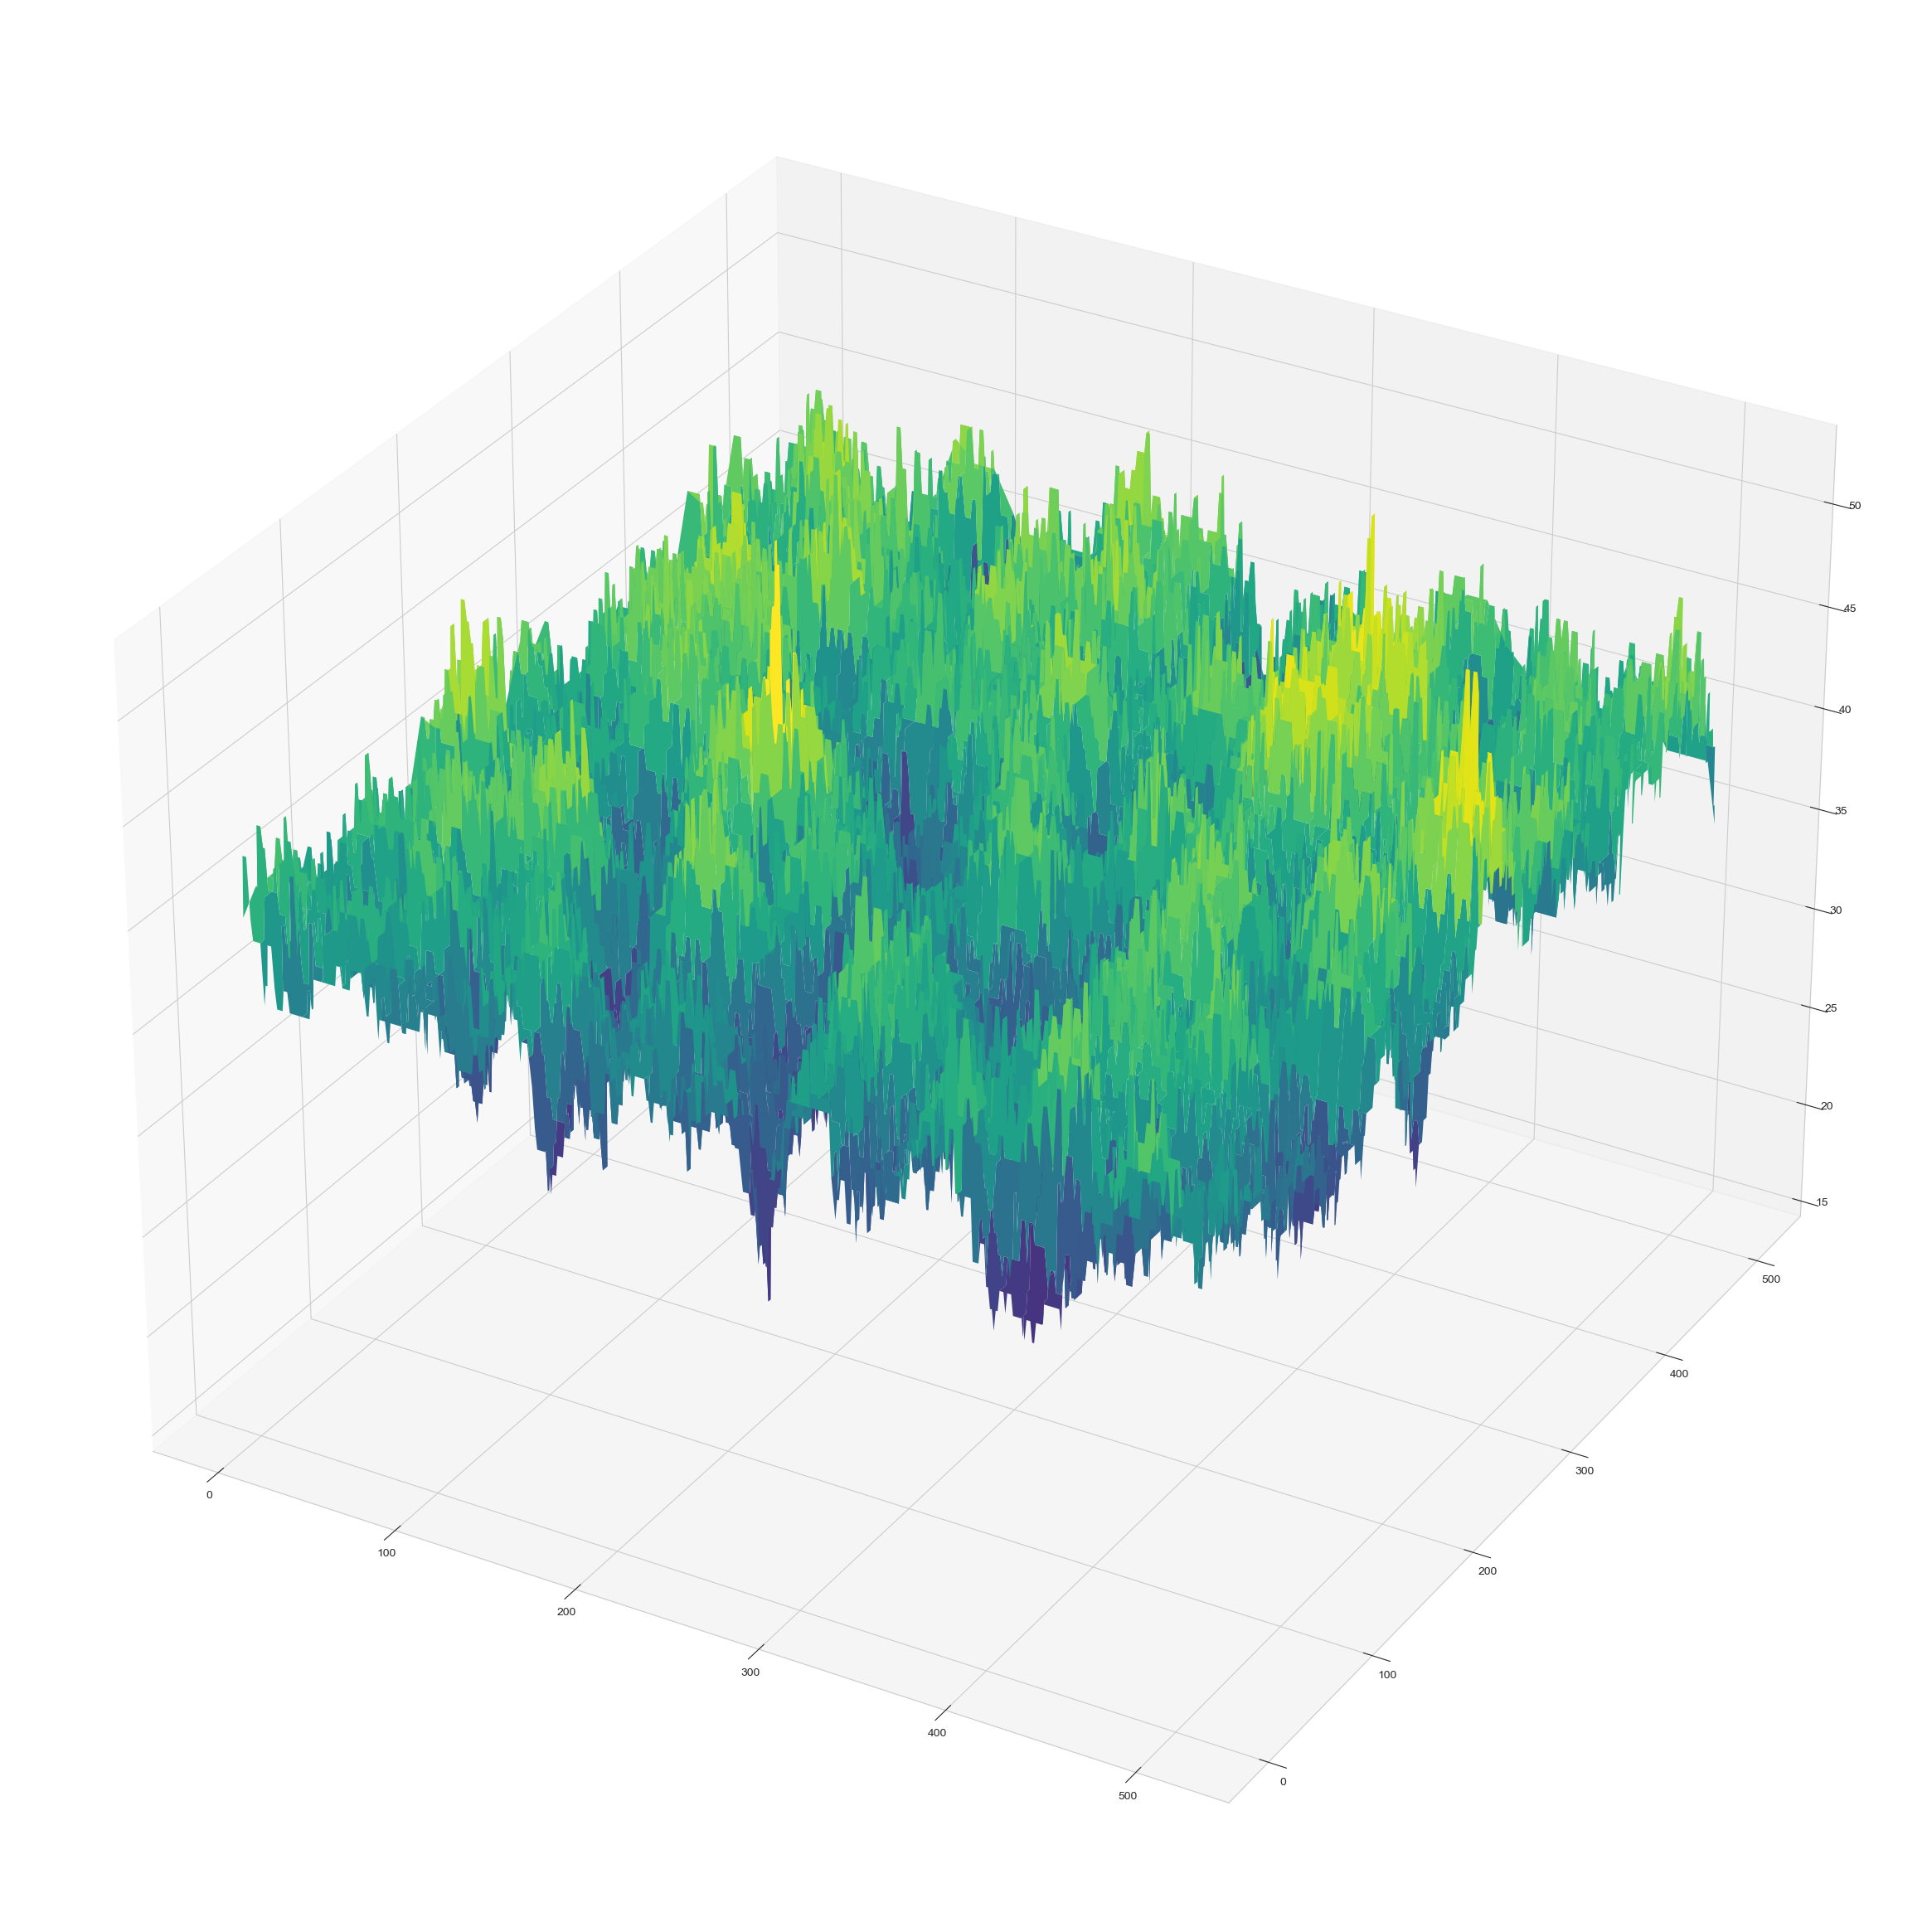

In [23]:
x = np.arange(0, surface.shape[1])
y = np.arange(0, surface.shape[2])
X, Y = np.meshgrid(x, y)
fig =  plt.figure(figsize=(30, 30))
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, h, cmap='viridis', edgecolor='none')


In [101]:
plt.savefig(r'\\132.72.218.248\Yuval_and_Shachar\evolution paper\\' + '%s_sideview_t%dy%d+membrane.png'%(movie,t,y))#, bbox_inches=extent)
plt.show()



<Figure size 640x480 with 0 Axes>